# Specific surface area determination

## BET surface area

Let's do a calculation of the BET area for these samples. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


pyGAPS attempts to calculate the applicable BET region on its own by using the Rouquerol rules. The function is `area_BET`, where we pass the `verbose` parameter to obtain a printed output of results and plots.

MCM-41
BET surface area: a = 3.60e+02 m2/g
Minimum pressure point is 0.034 and maximum is 0.256
The slope of the BET fit: s = 2.69e+02
The intercept of the BET fit: i = 2.21e+00
The BET constant is: C = 122.9
Amount for a monolayer: n = 3.69e-03 mol/g


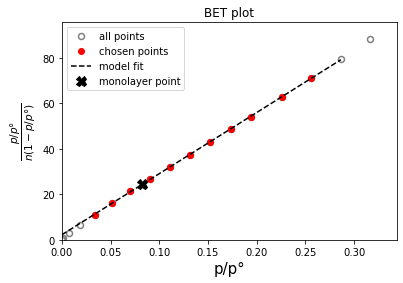

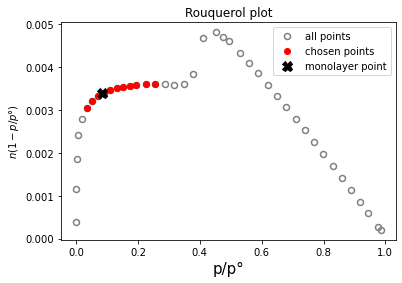

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
print(isotherm.material)
results =pygaps.area_BET(isotherm, verbose=True)

It looks that the correlation is reasonably good. A warning is emmited if this is not the case. We can also restrict the pressure range manually to see what difference it would make, by using the `limits` parameter.

BET surface area: a = 3.62e+02 m2/g
Minimum pressure point is 0.051 and maximum is 0.194
The slope of the BET fit: s = 2.67e+02
The intercept of the BET fit: i = 2.42e+00
The BET constant is: C = 111.3
Amount for a monolayer: n = 3.71e-03 mol/g


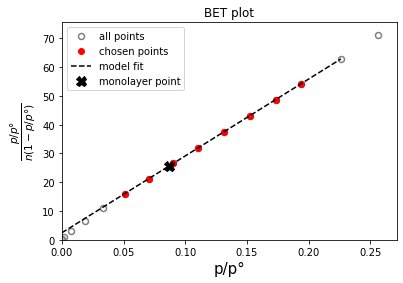

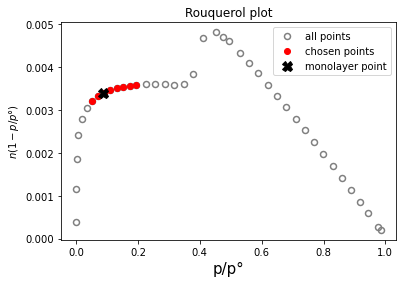

In [3]:
results = pygaps.area_BET(isotherm, limits=(0.05, 0.2), verbose=True)

Now let's do the analysis on all of the nitrogen samples. We'll assume the framework makes a reasonably accurate choice for the applicable range. The function returns a dictionary with all the calculated parameters, and we'll print the BET area from there.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.material, pygaps.area_BET(isotherm)))
    
[(x, f"{y['area']:.2f}") for (x,y) in results]

[(<pygaps.Material 'MCM-41'>, '359.68'),
 (<pygaps.Material 'NaY'>, '700.75'),
 (<pygaps.Material 'SiO2'>, '213.16'),
 (<pygaps.Material 'Takeda 5A'>, '1110.39'),
 (<pygaps.Material 'UiO-66(Zr)'>, '1277.40')]

We also have isotherms which were measured with $CO_2$ at room temperature. While there's no guarantee that the BET method is still applicable with this adsorbate and temperature, we can still attempt to perform the calculations.

It just happens that the isotherms were recorded on the same Takeda 5A carbon sample (see $N_2$ results above). Let's see how the $CO_2$ BET surface area looks in comparison.

Takeda 5A
BET surface area: a = 7.58e+02 m2/g
Minimum pressure point is 0.037 and maximum is 0.253
The slope of the BET fit: s = 1.30e+02
The intercept of the BET fit: i = 4.69e+00
The BET constant is: C = 28.8
Amount for a monolayer: n = 7.41e-03 mol/g


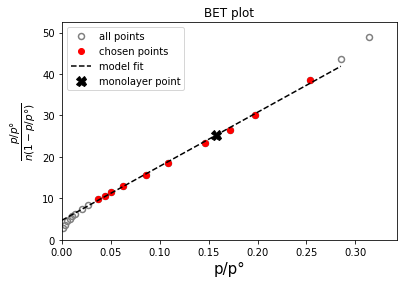

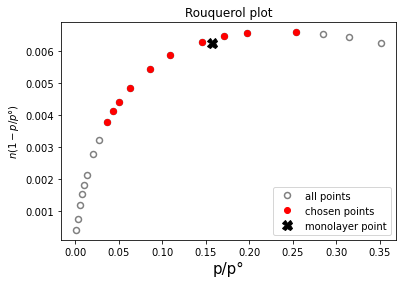

In [5]:
isotherm = next(i for i in isotherms_calorimetry if i.material=='Takeda 5A')
print(isotherm.material)
results = pygaps.area_BET(isotherm, verbose=True)

The surface area obtained with carbon dioxide is around 760 $m^2$. Compared to the nitrogen surface area of 1100 $m^2$, it is much smaller. While the checks implemented did not find anything wrong, this is likely due to interactions between carbon dioxide and the carbon surface leading to the breakdown of the BET theory.

While any kind of adsorbate and temperature (below critical) can be used, result interpretation is left at the discretion of the user.
More info can be found in the [documentation of the
module](https://pygaps.readthedocs.io/en/latest/reference/characterisation/area_bet.html).

## Langmuir surface area

Another common method of calculating specific surface area relies on fitting the isotherm with a Langmuir model. This model assumes adsorption occurs on active surface/pore sites, in a single layer. We use the `area_langmuir` function, which defaults to a region of 0.1-0.9 p/p0 for the fitting. We pass the `verbose` parameter to display the results automatically.

MCM-41
Langmuir surface area: a = 1.41e+03 m2/g
Minimum pressure point is 0.051 and maximum is 0.888
The slope of the Langmuir line: s = 6.92e+01
The intercept of the Langmuir line: i = 2.54e+01
The Langmuir constant is: K = 2.7
Amount for a monolayer: n = 1.45e-02 mol/g


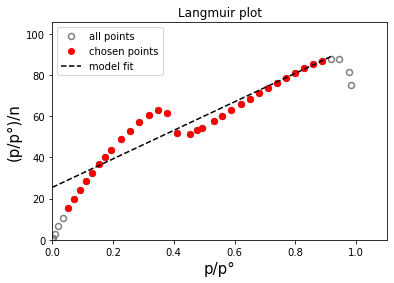

In [6]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
print(isotherm.material)
results = pygaps.area_langmuir(isotherm, verbose=True)

The correlation is not very good due to condensation in mesopores of MCM-41, which is not predicted by the Langmuir model. Due to this, the area calculated is not realistic. We can manually select a range in the monolayer adsorption regime for a better fit.

MCM-41
Langmuir surface area: a = 5.50e+02 m2/g
Minimum pressure point is 0.051 and maximum is 0.286
The slope of the Langmuir line: s = 1.77e+02
The intercept of the Langmuir line: i = 8.24e+00
The Langmuir constant is: K = 21.5
Amount for a monolayer: n = 5.64e-03 mol/g


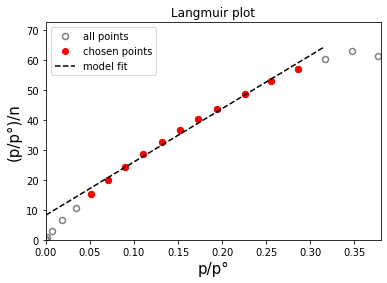

In [7]:
print(isotherm.material)
results = pygaps.area_langmuir(isotherm, limits=(0.05, 0.3), verbose=True)

The fit is now better and the calculated area is also realistic. Comparing it to the BET area obtained previously, we see that it is higher by about 150 m2. Since adsoprtion is more likely to occur in monolayers until pore condensation, this method is not really suited for MCM-41. In general the Langmuir surface area is not as widely applicable as the BET one.

Now let's do the analysis on all of the nitrogen samples and compare the obtained surface areas with the BET ones.

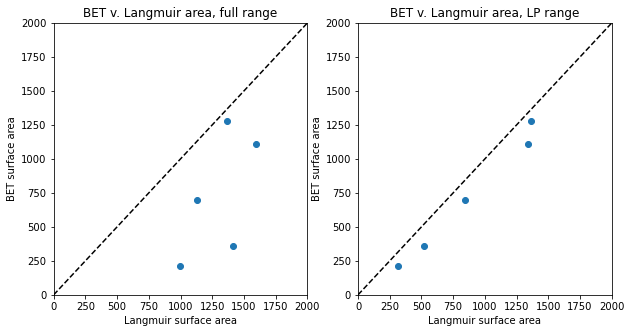

In [8]:
area_langmuir = []
area_langmuir_lim = []
area_bet = []
for isotherm in isotherms_n2_77k:
    area_bet.append(pygaps.area_BET(isotherm)['area'])
    area_langmuir.append(pygaps.area_langmuir(isotherm)['area'])
    area_langmuir_lim.append(pygaps.area_langmuir(isotherm, limits=(0.01, 0.3))['area'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(area_langmuir, area_bet)
ax2.scatter(area_langmuir_lim, area_bet)

ax1.set_title('BET v. Langmuir area, full range')
ax2.set_title('BET v. Langmuir area, LP range')

ax1.plot([0,2000], [0,2000], 'k--')
ax2.plot([0,2000], [0,2000], 'k--')

ax1.set_xlim(left=0, right=2000)
ax1.set_ylim(bottom=0, top=2000)
ax2.set_xlim(left=0, right=2000)
ax2.set_ylim(bottom=0, top=2000)

ax1.set_xlabel('Langmuir surface area')
ax1.set_ylabel('BET surface area')
ax2.set_xlabel('Langmuir surface area')
ax2.set_ylabel('BET surface area')

plt.show()

We can see that some points correspond, while others are not as well correlated. Unless the adsorption isotherm respects the Langmuir model, the calculated surface areas do not match. However, if the Langmuir area is calculated in a low pressure regime, ideally before multilayer adsorption or condensation occurs, the two specific areas are better correlated (right graph).


More info can be found in the [documentation of the
module](https://pygaps.readthedocs.io/en/latest/reference/characterisation/area_lang.html).